# Comparative Analysis
In this notebook, we compare SVM with different window size detection techniques.

In [10]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [11]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [12]:
wsd = ["Human", "FFT", "ACF", "SuSS", "MWF", "Autoperiod", "RobustPeriod"] # 

methods = list()

for algo in wsd:
    candidate_name = f"svm_{algo}"
    methods.append((algo, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/anomaly_detection/svm/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df.match
    
df_scores

,name,Human,FFT,ACF,SuSS,MWF,Autoperiod,RobustPeriod
0,DISTORTED1sddb40,False,False,False,False,False,False,False
1,DISTORTED2sddb40,False,False,False,False,False,False,False
2,DISTORTED3sddb40,False,False,False,False,False,False,False
3,DISTORTEDBIDMC1,True,True,True,False,True,True,False
4,DISTORTEDCIMIS44AirTemperature1,False,False,False,False,False,False,False
5,DISTORTEDCIMIS44AirTemperature2,False,False,False,False,False,False,False
6,DISTORTEDCIMIS44AirTemperature3,False,False,False,False,False,False,False
7,DISTORTEDCIMIS44AirTemperature4,False,False,False,False,False,False,False
8,DISTORTEDCIMIS44AirTemperature5,False,False,False,False,False,False,False
9,DISTORTEDCIMIS44AirTemperature6,False,False,False,False,False,False,True


Let's calculate the mean/std score.

In [13]:
df_scores.mean(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4231/3278697802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0)


Human           0.140
FFT             0.148
ACF             0.132
SuSS            0.168
MWF             0.132
Autoperiod      0.164
RobustPeriod    0.180
dtype: float64

In [14]:
df_scores.std(axis=0)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4231/4283968224.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0)


Human           0.347683
FFT             0.355812
ACF             0.339170
SuSS            0.374616
MWF             0.339170
Autoperiod      0.371018
RobustPeriod    0.384958
dtype: float64

Let's compute the wins per method.

In [15]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [16]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

Human:wins=205 rank=1.444
FFT:wins=207 rank=1.352
ACF:wins=203 rank=1.404
SuSS:wins=212 rank=1.384
MWF:wins=203 rank=1.392
Autoperiod:wins=211 rank=1.292
RobustPeriod:wins=215 rank=1.428


Let's plot and output the ranks.

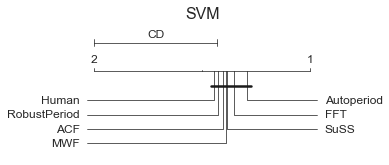

In [17]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], highv=2, cd=cd, width=5, reverse=True, textspace=1, )
plt.title("SVM", fontsize=16)
plt.show()

Let's compute wins/losses against Human.

In [18]:
selection = "Human"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

Human vs FFT: (wins/ties/losses): 14/220/16
Human vs ACF: (wins/ties/losses): 16/220/14
Human vs SuSS: (wins/ties/losses): 15/213/22
Human vs MWF: (wins/ties/losses): 16/220/14
Human vs Autoperiod: (wins/ties/losses): 11/222/17
Human vs RobustPeriod: (wins/ties/losses): 18/204/28
